This notebook is aimed at analysing and isualising the mortality rates in countries across the glode.

In [1]:
#To begin, we import relevant libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Then we proceed to load our data to df
df = pd.read_csv('ChildMOrtalytRate.csv')

In [3]:
#Observing the data
df.head()

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
0,0,Afghanistan,1967,Female,26012.0,5080.813,5.119653
1,1,Afghanistan,1968,Female,26192.0,5202.606,5.034400
2,2,Afghanistan,1969,Female,26335.0,5333.936,4.937255
3,3,Afghanistan,1970,Female,26562.0,5476.630,4.850063
4,4,Afghanistan,1971,Female,26671.0,5630.099,4.737217


In [4]:
df.dtypes

Unnamed: 0                   int64
Country                     object
Year                         int64
Gender                      object
Child Mortality(1 to 4)    float64
Total Population           float64
Mortality Rate             float64
dtype: object

In [5]:
df.shape

(30940, 7)

In [6]:
df.describe(include = 'all')

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
count,30940.000000,30940,30940.000000,30940,3.094000e+04,3.006400e+04,30064.000000
unique,NaN,194,NaN,3,NaN,NaN,NaN
top,NaN,Poland,NaN,Female,NaN,NaN,NaN
freq,NaN,195,NaN,10362,NaN,NaN,NaN
mean,15469.500000,NaN,1991.456561,NaN,1.272722e+04,1.975113e+04,0.959470
std,8931.753001,NaN,17.323382,NaN,6.370284e+04,8.053780e+04,1.481062
min,0.000000,NaN,1955.000000,NaN,0.000000e+00,1.606000e+00,0.000000
25%,7734.750000,NaN,1978.000000,NaN,6.900000e+01,9.928218e+02,0.044134
50%,15469.500000,NaN,1993.000000,NaN,6.490000e+02,3.890678e+03,0.225487
75%,23204.250000,NaN,2006.000000,NaN,6.499500e+03,1.175135e+04,1.292107


In [7]:
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Year                         0
Gender                       0
Child Mortality(1 to 4)      0
Total Population           876
Mortality Rate             876
dtype: int64

In [8]:
df['Total Population'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30935    False
30936    False
30937    False
30938    False
30939    False
Name: Total Population, Length: 30940, dtype: bool

This Notebook will be analysing the data for Nigeria explicitly

In [9]:
#Creating a new data frame 
Nigeria = df[df['Country'] == 'Nigeria']

In [10]:
#Checking for null values
Nigeria.isnull().sum()

Unnamed: 0                 0
Country                    0
Year                       0
Gender                     0
Child Mortality(1 to 4)    0
Total Population           0
Mortality Rate             0
dtype: int64

In [11]:
#Displaying the data
Nigeria.head()

,Unnamed: 0,Country,Year,Gender,Child Mortality(1 to 4),Total Population,Mortality Rate
20106,20106,Nigeria,1969,Female,133097.0,27360.228,4.864616
20107,20107,Nigeria,1970,Female,132351.0,27987.755,4.728889
20108,20108,Nigeria,1971,Female,132016.0,28640.820,4.609365
20109,20109,Nigeria,1972,Female,131312.0,29321.189,4.478400
20110,20110,Nigeria,1973,Female,130610.0,30039.576,4.347931


In [12]:
#Renaming a column for simplicity
Nigeria['Child Mortality'] = Nigeria['Child Mortality(1 to 4)']

In [13]:
#dropping the old column to avoid repetition
Nigeria.drop('Child Mortality(1 to 4)',inplace = True, axis=1)

In [14]:
#Quick statistics
bygender = Nigeria.groupby('Gender')
bygender['Child Mortality'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,51.0,152714.862745,15995.724818,129420.0,134221.5,154921.0,165004.5,177472.0
Male,51.0,162113.470588,16533.864797,138519.0,143890.0,163475.0,175470.5,187760.0
Total,51.0,314828.333333,32517.006336,268081.0,277964.0,318432.0,340475.0,365232.0


We see that the minimum value for Child mortality in female is 129420.0 while it is 138519.0 in male children. However, the average value for the male gender is higher than that nof female. 

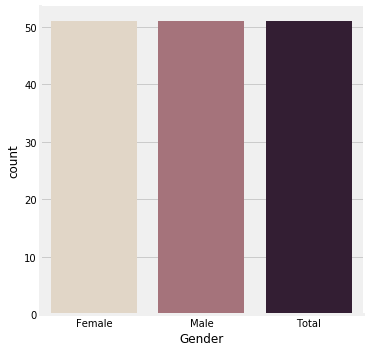

In [15]:
#visualising the gender distribution
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=Nigeria)

Both genders are equally represented in the data collected

In [16]:
#here we are trying to see which gender has the highest value.
bygender = Nigeria.groupby('Gender')
Mortality_by_gender_sum = bygender['Child Mortality'].sum()
Mortality_by_gender_sum

Gender
Female     7788458.0
Male       8267787.0
Total     16056245.0
Name: Child Mortality, dtype: float64

As suggested by the mean values earlier dispalyed, more male children are lost tto child mortality.

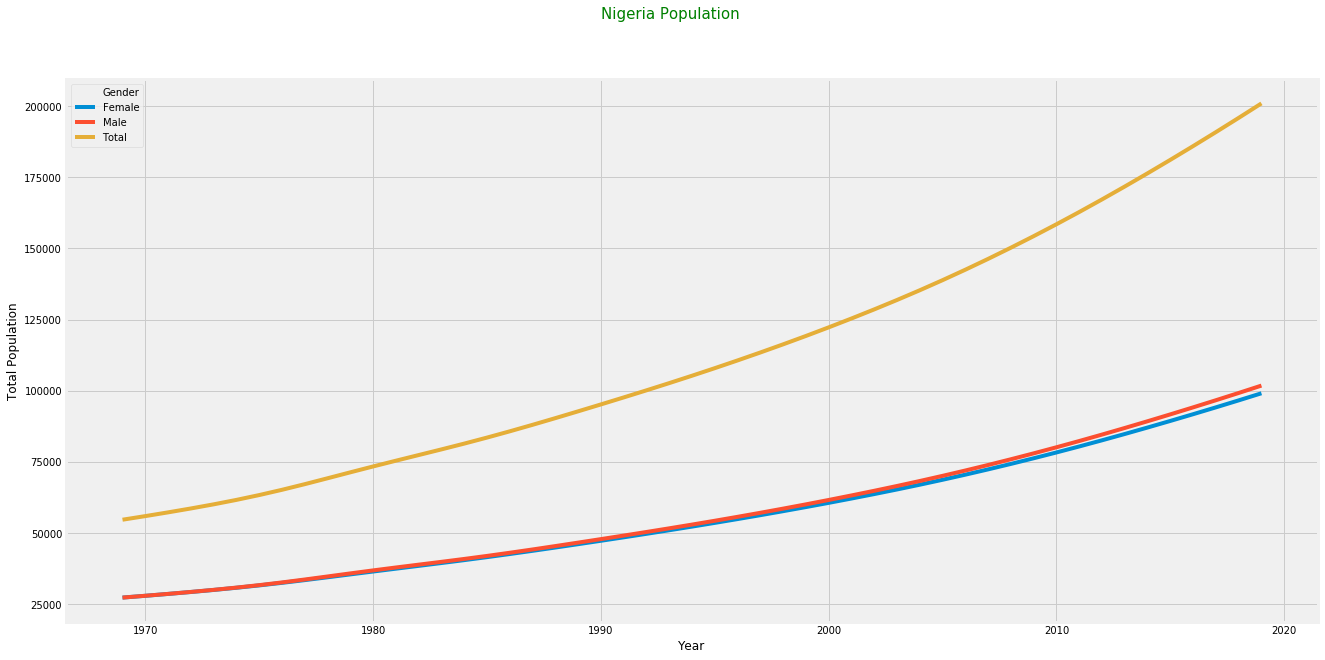

In [17]:
# We move on to observing the Nigerian population
fig, axs = plt.subplots( sharex=True, figsize=[20,10] )
fig.suptitle('Nigeria Population', fontsize=15, color='green')
axs.set_ylabel('Total Population in thousands')
sns.lineplot(ax=axs, data=Nigeria, x='Year' , y='Total Population', hue='Gender' )

It can be observed that the male population is generally sligtly higher than the female population in Nigera. Also, the Nigerian population has grown exponentially over ther years.

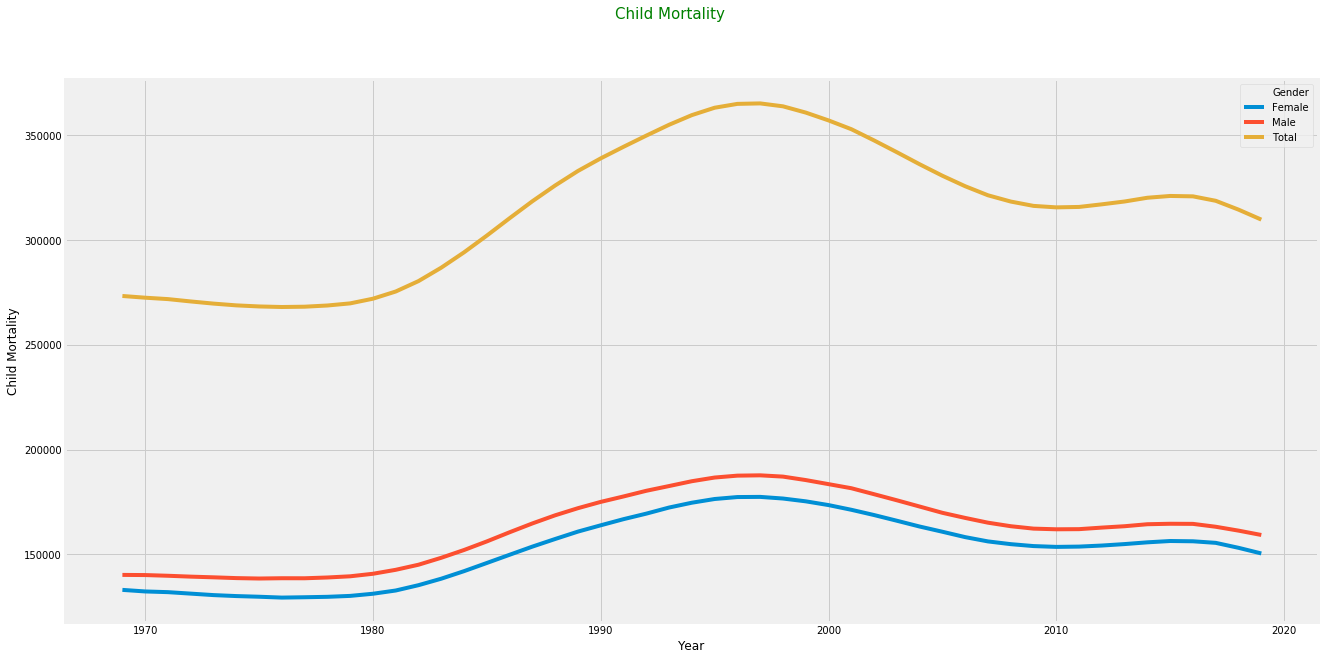

In [18]:
#plotting Child Mortality by gender
fig, axs = plt.subplots( sharex=True, figsize=[20,10] )
fig.suptitle('Child Mortality', fontsize=15, color='green')
sns.lineplot(ax=axs, data=Nigeria, x='Year' , y= Nigeria['Child Mortality'], hue='Gender' )


As we earlier mentioned, the value for child mortality in male children is higher. Generally, the worst period was betwwen 1990 and 2000
The value has dropped in the last decade, but it is still higher than the 1970s values.

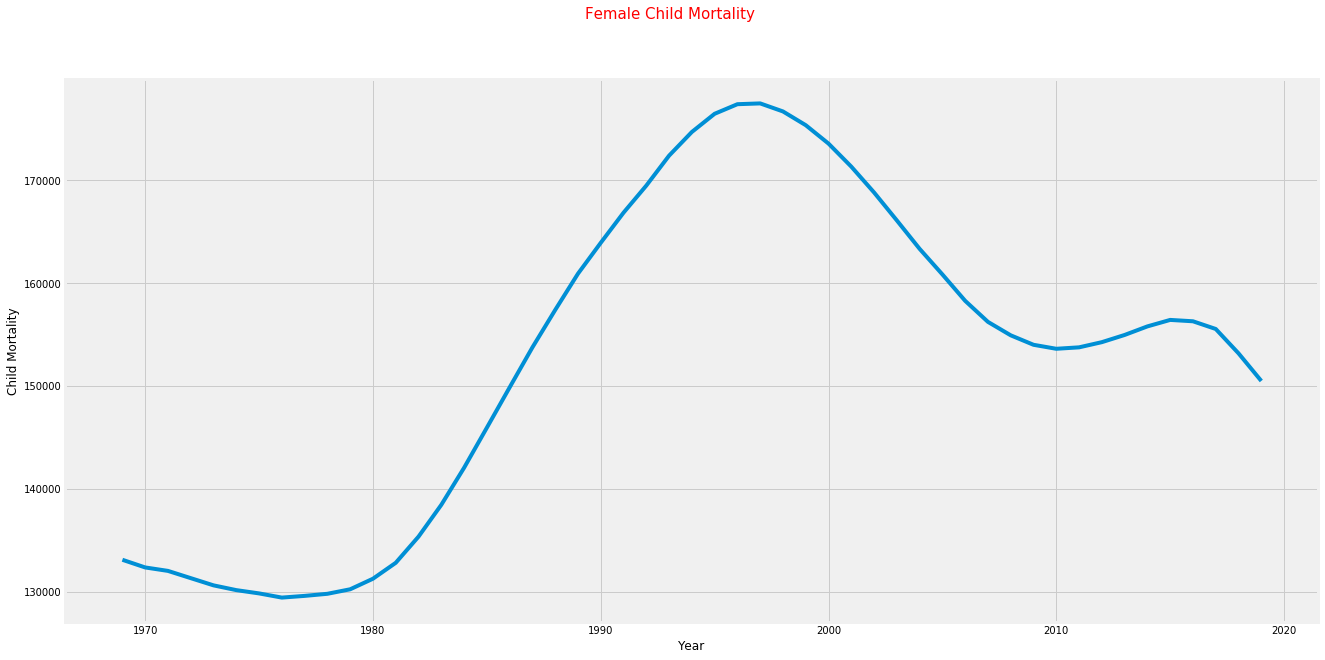

In [19]:
#displaying for female children
fig, axs = plt.subplots( sharex=True, figsize=[20,10] )
fig.suptitle('Female Child Mortality', fontsize=15, color='red')
sns.lineplot(ax=axs, data=Nigeria['Child Mortality'], x= Nigeria['Year'], y= Nigeria.Gender =='Female' )

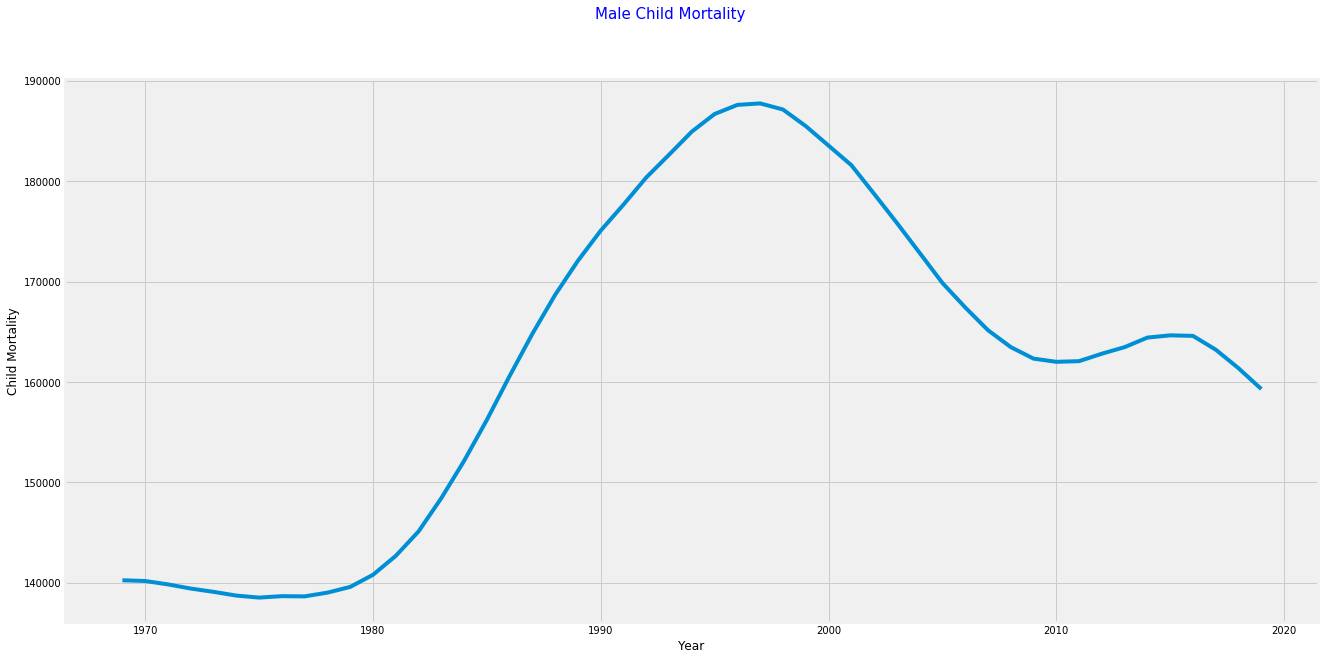

In [20]:
#displaying for male children
fig, axs = plt.subplots( sharex=True, figsize=[20,10] )
fig.suptitle('Male Child Mortality', fontsize=15, color='blue')
sns.lineplot(ax=axs, data=Nigeria['Child Mortality'], x= Nigeria['Year'], y= Nigeria.Gender =='Male' )

Now we observe the Mortality rate in Isolation

In [21]:
#Creating a new dayta frame
Years = Nigeria[['Year', 'Mortality Rate']]
Years 

,Year,Mortality Rate
20106,1969,4.864616
20107,1970,4.728889
20108,1971,4.609365
20109,1972,4.478400
20110,1973,4.347931
...,...,...
20254,2015,1.772521
20255,2016,1.725546
20256,2017,1.670004
20257,2018,1.605838


In [22]:
#Setting the index
Years = Years.set_index('Year')

In [23]:
Years.shape

(153, 1)

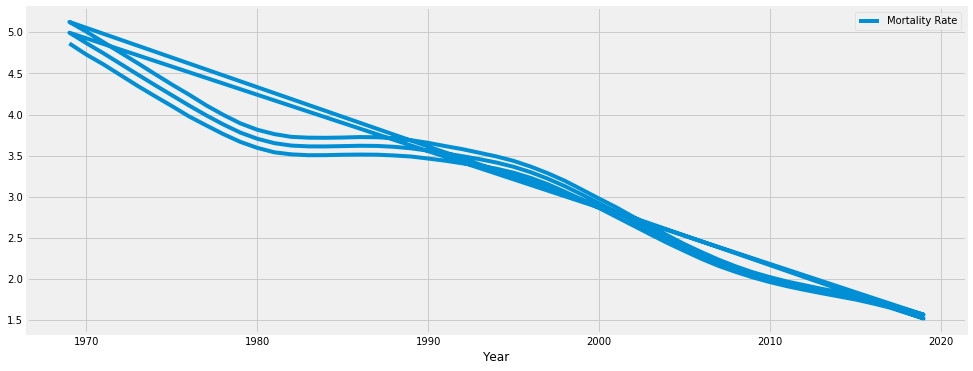

In [24]:
#plotting the values
Years.plot(figsize=(15,6))

Although we saw from the visualizations above that the number for child mortality is still high, this graph shows a general downwards trend. This can be explained by the exponential growth in population as Mortality rate is a function of both Child mortality and population.

We move to trying our hands on  predictive analysis for child mortality in Nigeria.

In [25]:
Nigeria.head()

,Unnamed: 0,Country,Year,Gender,Total Population,Mortality Rate,Child Mortality
20106,20106,Nigeria,1969,Female,27360.228,4.864616,133097.0
20107,20107,Nigeria,1970,Female,27987.755,4.728889,132351.0
20108,20108,Nigeria,1971,Female,28640.820,4.609365,132016.0
20109,20109,Nigeria,1972,Female,29321.189,4.478400,131312.0
20110,20110,Nigeria,1973,Female,30039.576,4.347931,130610.0


In [26]:
#re arranging the columns
Nigeria = Nigeria[['Unnamed: 0', 'Country', 'Year', 'Gender', 'Total Population', 'Child Mortality',
       'Mortality Rate']]

In [27]:
#dropping irrelevant columns
Nigeria.drop(['Unnamed: 0', 'Country'],  axis = 1, inplace =True )


In [28]:
Nigeria

,Year,Gender,Total Population,Child Mortality,Mortality Rate
20106,1969,Female,27360.228,133097.0,4.864616
20107,1970,Female,27987.755,132351.0,4.728889
20108,1971,Female,28640.820,132016.0,4.609365
20109,1972,Female,29321.189,131312.0,4.478400
20110,1973,Female,30039.576,130610.0,4.347931
...,...,...,...,...,...
20254,2015,Total,181137.454,321070.0,1.772521
20255,2016,Total,185960.244,320883.0,1.725546
20256,2017,Total,190873.247,318759.0,1.670004
20257,2018,Total,195874.685,314543.0,1.605838


In [29]:
#importing relevant libraries
from xgboost import XGBRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [30]:
#Selecting features
X = Nigeria[['Year', 'Gender', 'Total Population', 'Child Mortality'
       ]]

In [31]:
#Encoding for compatibility
X = X.apply(LabelEncoder().fit_transform)

In [32]:
#Setting our target variable
y = Nigeria[['Mortality Rate']]

In [33]:
# Splitting data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#Creating the model
xgb = XGBRegressor(use_label_encoder = False)
model = xgb.fit(X_train, y_train)

[04:59:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
#Saving the predictions
predictions = model.predict(X_test)

In [36]:
#Evaluating the model
MSE = mean_squared_error(y_test, predictions)

In [37]:
MSE

0.002076338940454419

In [38]:
predictions

array([2.6811638, 2.4884033, 1.7795391, 3.6445558, 3.1319523, 3.7014647,
       3.3160057, 3.082564 , 3.5043192, 3.5031676, 3.50583  , 3.6299393,
       3.799447 , 1.9178665, 4.9924817, 3.707725 , 4.110057 , 2.5808544,
       3.7062142, 1.8237163, 3.4836988, 3.5796285, 2.8977485, 3.7062142,
       4.5754037, 2.9948912, 3.3421204, 3.1735613, 2.6350155, 2.3735504,
       3.7022505], dtype=float32)